Download Covid Data set from the website https://ourworldindata.org/covid-cases 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df.date)

In [3]:
start_date = datetime.strftime(df['date'].min(), '%Y-%m-%d')
last_date = datetime.strftime(df['date'].max(), '%Y-%m-%d')

print('Start Observation :', start_date)
print('Last Observation :', last_date)

Start Observation : 2020-01-01
Last Observation : 2023-03-16


## Q1 
- What is the probability of dying from COVID infection in France in March 2023 for a 25 year old? Draw the relevant correlation projections.

In [4]:
df_france = df[df.location == 'France'].reset_index(drop=True).copy()

In [5]:
df_france_03_23 = df_france[(df_france['date'].dt.year == 2023) & (df_france['date'].dt.month == 3)].copy()

In [6]:
df_france_03_23[['new_cases','new_deaths', 'median_age', 'population']]

,new_cases,new_deaths,median_age,population
1153,5651.0,34.0,42.0,67813000.0
1154,4525.0,25.0,42.0,67813000.0
1155,4196.0,21.0,42.0,67813000.0
1156,3194.0,21.0,42.0,67813000.0
1157,4013.0,17.0,42.0,67813000.0
1158,3180.0,0.0,42.0,67813000.0
1159,953.0,26.0,42.0,67813000.0
1160,7063.0,24.0,42.0,67813000.0
1161,5987.0,27.0,42.0,67813000.0
1162,6308.0,11.0,42.0,67813000.0


#### median_age : Median age of the population, UN projection for 2020

In [7]:
df_france_03_23['median_age_23'] = df_france_03_23['median_age'] + 3 

In [8]:
mean_or_median = df_france_03_23['median_age_23'].unique()[0]
mean_or_median

45.0

In [9]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Probability Density')

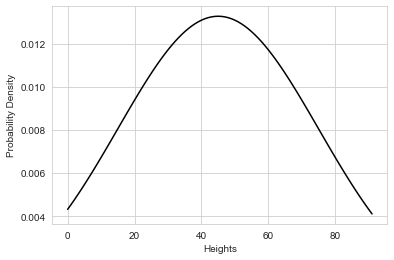

In [10]:
data = np.arange(0,92, 1)
pdf = norm.pdf(data , loc = mean_or_median, scale = 30)

sns.set_style('whitegrid')
sns.lineplot(x= data, y=pdf , color = 'black')
plt.xlabel('Heights')
plt.ylabel('Probability Density')

### Reference image for Age Distribution

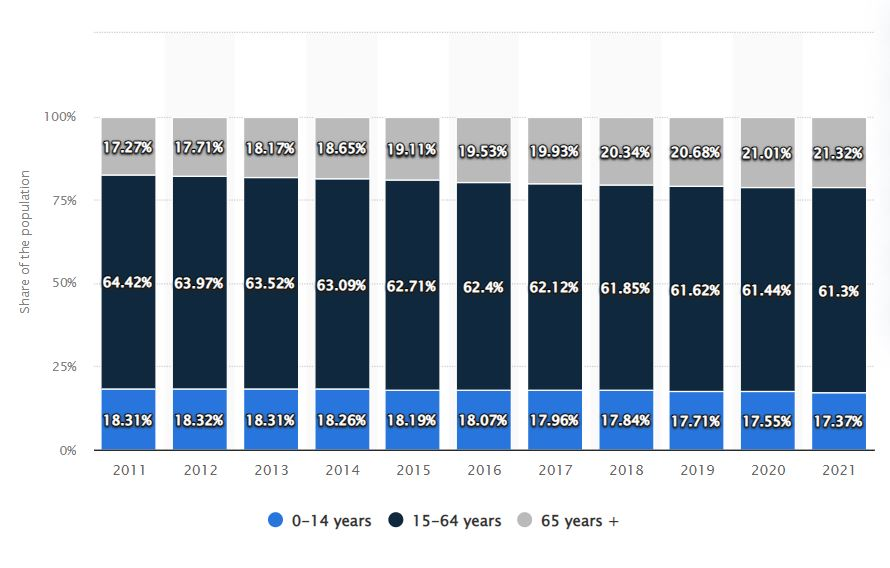

## Assumption
- For this question, i will use this assumption, the distribution of age is most likely to be normal distribution.
- With try and error, i get scale (std dev) is 29, based on this std deviation, the distribution will produce almost similar with reference image above.

In [17]:
scale = 29
a = norm(loc = mean_or_median , scale = scale).cdf(14)*100
b = norm(loc = mean_or_median , scale = scale).cdf(64)*100
c = 100 - b

print('Cummulative Probability of age below 14 :', round(a,2), '%')
print('Cummulative Probability of age 15 to 64 :', round(b-a,2), '%') 
print('Cummulative Probability of age above 64 :', round(c,2), '%')

Cummulative Probability of age below 14 : 14.25 %
Cummulative Probability of age 15 to 64 : 60.13 %
Cummulative Probability of age above 64 : 25.62 %


In [27]:
prob_age25 = round(norm(loc = mean_or_median , scale = scale).pdf(25)*100,2)
print(f'Probability of Age 25 : {prob_age25} %')

Probability of Age 25 : 1.08 %


In [13]:
sum_of_new_case = df_france_03_23.new_cases.sum()
sum_of_new_case

73060.0

In [14]:
sum_of_deaths = df_france_03_23.new_deaths.sum()
sum_of_deaths

311.0

In [24]:
prob_death = round((sum_of_deaths/sum_of_new_case)*100,2)
print(f"Probability of death : {prob_death} %")

Probability of death : 0.43 %


In [25]:
prob_death_age25 = round((prob_age25/prob_death),3)
print(f"Probability of age 25 given death : {prob_death_age25} %")

Probability of age 25 given death : 2.512 %


## Q2 
- What is the correlation between the number of deaths with age for the US, China, France and Germany?.

In [42]:
df_4_country = df[df.location.isin(['United States','China','France','Germany'])].copy()

In [43]:
df_4_country['year'] = df_4_country['date'].dt.year

In [44]:
df_4_country['median_age_add'] = df_4_country['median_age'] + df_4_country['year']-2020

In [46]:
df_4_country[['year', 'median_age_add']]

,year,median_age_add
51438,2020,38.7
51439,2020,38.7
51440,2020,38.7
51441,2020,38.7
51442,2020,38.7
...,...,...
279401,2023,41.3
279402,2023,41.3
279403,2023,41.3
279404,2023,41.3


In [50]:
df_4_country_agg = df_4_country.groupby(['location', 'year']).agg({'new_deaths':'sum', 'median_age_add':'mean'}).reset_index()

In [58]:
df_4_country_agg

,location,year,new_deaths,median_age_add
0,China,2020,4788.0,38.7
1,China,2021,911.0,39.7
2,China,2022,40189.0,40.7
3,China,2023,74688.0,41.7
4,France,2020,64004.0,42.0
5,France,2021,56996.0,43.0
6,France,2022,37356.0,44.0
7,France,2023,3246.0,45.0
8,Germany,2020,50441.0,46.6
9,Germany,2021,67986.0,47.6


In [59]:
for country in df_4_country_agg.location.unique():
    corr = df_4_country_agg[df_4_country_agg.location == country][['new_deaths', 'median_age_add']].corr().iloc[0,1]
    print(f'Correlation Age and Death in {country} : {round(corr,2)}')

Correlation Age and Death in China : 0.93
Correlation Age and Death in France : -0.96
Correlation Age and Death in Germany : -0.76
Correlation Age and Death in United States : -0.81
